# Power Patterns: Harnessing Electricity for Innovation

Welcome to the <i> Power Patterns: Harnessing Electricity for Innovation </i> Challenge, an exploration into load profile clustering. Every building has a unique signature in electricity consumption patterns that depends on a variety of factors. A load profile is a data record of a utility customer's electricity consumption patterns over a specific period of time. It ranges from minutes to years and provides valuable insights into when and how energy is being used, allowing electric utility companies to better understand behaviors and preferences. Load profiles record energy usage throughout the day, showing peaks and valleys in energy consumption levels.

Load profile clustering involves the categorization of buildings based on similar energy consumption patterns. This process holds significant practical value, especially in applications like load forecasting and the development of demand-response (DR) programs. The identification of similar load profiles enables utilities to optimize their Demand Side Management (DSM) strategies for distinct groups or clusters of buildings with comparable energy usage patterns.

One compelling example is the customization of Time-of-Use (ToU) tariffs, a strategy that proves effective in shifting peak loads and enhancing overall grid stability. By tailoring these tariffs to specific load profile clusters, utilities can encourage consumers to adjust their energy consumption behavior during peak demand periods.

Moreover, load clustering plays a pivotal role in the integration of buildings into the grid. This integration becomes particularly crucial in scenarios involving buildings equipped with on-site generation sources like photovoltaic systems. These buildings can contribute excess electricity back to the grid when needed. However, the relatively modest electricity generation from individual buildings necessitates the aggregation of numerous buildings with similar profiles. This aggregation transforms them into a Virtual Power Plant (VPP), demonstrating the potential of load profile clustering in facilitating Building-to-Grid integration and supporting sustainable energy practices.

In this unstructured challenge, you'll embark on a journey to analyze energy consumption data from 1277 load profiles representing residential and commercial buildings in the US. Your primary objective is to develop a clustering model capable of grouping these buildings into meaningful clusters. The ultimate goal is to provide insights for the design of demand-response programs tailored to the specific characteristics of each cluster. In the context of this challenge, you have the flexibility to choose from the above-mentioned demand-response programs or even opt for a DR program of your own preference. The objective is to align the chosen DR program with the characteristics and requirements revealed through the energy analysis and building clustering. Your Jupyter Notebook submission will be evaluated according to the following 5 criteria (also see the challenge overview for the evaluation criteria):


1) **Exploratory Data Analysis (20%):** Comprehensive exploratory data analysis (EDA) is crucial for understanding the data. This involves visualizing and summarizing key statistics to gain insights into the distribution, patterns, and potential relationships within the dataset.
2) **Feature Engineering and Extraction (20%):** Temporal resolution analysis and feature engineering play a pivotal role in building an effective clustering model. This step involves extracting relevant features from the temporal data to capture patterns and variations in energy consumption.
3) **Unsupervised Learning (Clustering Model) (25%):** Implementing a clustering model is essential for grouping buildings into meaningful clusters. Experiment with various clustering algorithms, selecting the one that best suits the data and aligns with the chosen DR program(s). Clearly articulate the evaluation criteria for the chosen clustering algorithm(s). <b>We strongly recommend keeping the number of clusters under 10</b>, as designing DR programs for a very large number of building clusters (customer segments) is often not very practical. With that said, if a slightly larger number of clusters strongly suits your chosen DR program, you may go as high as <b>15</b>, but certainly no more than that. <i>Exceeding 10 clusters must be thoroughly justified, and 15 is a strict upper limit</i>.
4) **Interpretation and Recommendations for DR Programs (25%):** Interpretation of the clustering model results is vital. Provide insights into how the clusters can be utilized for specific demand-response programs. Offer recommendations on the practical implementation of these programs based on the characteristics of each cluster.
5) **Notebook Presentation (10%):** The overall presentation of your Jupyter Notebook is crucial for reproducibility and understanding. Ensure your notebook is well-documented, organized, and easy to follow. Include clear explanations, visualizations, and comments to guide the reader and the judges through each step of your analysis.

Remember, there is no single correct solution, and creativity and critical thinking will be key to delivering a successful submission.


### Supplied Materials:
 
*  Starter Notebook
*  1277 `<building_id>.parquet` files (in the `data` folder) containing timestamped electricity load profiles for 1277 buildings: this is the main data you should work with for clustering.
*  120 `<building_id>.parquet` files (in the `auxiliary_data` folder) containing timestamped electricity load profiles for 120 example buildings: this is auxiliary data that is used in the starter notebook for demonstration purposes only. Your analysis should not be based on this data.
*  `auxiliary_data_building_tags.csv` file containing some building tags (metadata) for the example files/buildings in the `auxiliary_data` folder: this will be used in the starter notebook for demonstration purposes only.
*  `requirements.txt` should contain all required packages

### Data:

Each of the above-metioned load profile timestamped `.parquet` files contains time series of electricity energy consumption for the corresponding building, starting from Jan 1, 2018 (`2018-01-01 00:15:00`) till the end of  Dec 21, 2018 (`2018-12-22 00:00:00`), with 15 minutes incremenets. All the times are in Eastern Standard Time (EST). Energy consumptions are in `kWh`. Energy consumptions for each timestamp (row) are the energy consumed during the 15 minutes ending at that timestamp. For example, for the row corresponding to `2018-12-20 17:15:00` the electricity load is the energy consumed from `2018-12-20 17:00:00` till `2018-12-20 17:15:00`.


### Data loading and exploration

Below are a few code snippets that show you how to load and explore the data.

Please remember to include any packages you use in a `requirements.txt` file and include it in the starter notebook folder.

In [1]:
 # ONLY RUN THIS CELL ONCE 
#!pip install -r requirements.txt

In [24]:
# importaing the required libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval
from tslearn.clustering import KShape
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from utils import calculate_average_hourly_energy_consumption, add_building_tags, normalize_df, get_building_tag_values, fit_kshape_clustering, plot_kshape_clustering


In [2]:
load_filepath = os.getcwd()+'/auxiliary_data/1.parquet' # path to the auxiliary data files
df = pd.read_parquet(load_filepath, engine='pyarrow')

# show the first 10 rows of the df dataframe
df.head(10)

,timestamp,out.electricity.total.energy_consumption
bldg_id,,
1,2018-01-01 00:15:00,0.289
1,2018-01-01 00:30:00,0.292
1,2018-01-01 00:45:00,0.257
1,2018-01-01 01:00:00,0.183
1,2018-01-01 01:15:00,0.196
1,2018-01-01 01:30:00,0.246
1,2018-01-01 01:45:00,0.283
1,2018-01-01 02:00:00,0.317
1,2018-01-01 02:15:00,0.321


Below we plot electricity energy consumption for 3 buildings.

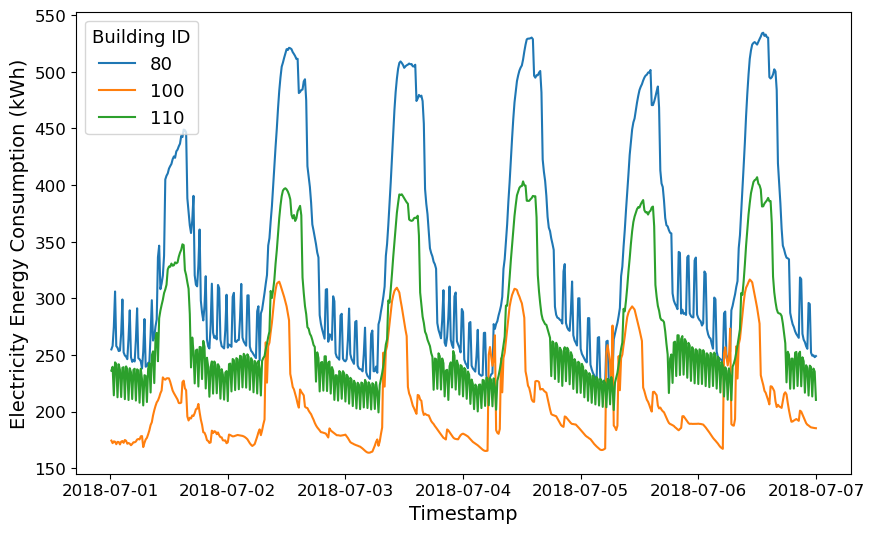

In [3]:
load_folderpath = os.getcwd()+'/auxiliary_data' # path to the auxiliary data folder

# List of Parquet file names for plotting
files_list = ['80.parquet','100.parquet','110.parquet']

# Initialize an empty list to store DataFrames
dfs = []

# Read each Parquet file and store in the list
for file_name in files_list:
    file_path = f'{load_folderpath}/{file_name}'
    df = pd.read_parquet(file_path, engine='pyarrow')
    dfs.append(df)

# Define start and end dates/times for the plot
start_date = '2018-07-01 00:15:00'
end_date = '2018-07-07 00:00:00'

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

for i, df in enumerate(dfs):
    # Filter data within the specified date/time range
    filtered_df = df[(df['timestamp'] >= start_date) & (df['timestamp'] <= end_date)]
    
    ax.plot(filtered_df['timestamp'], filtered_df['out.electricity.total.energy_consumption'],
             label=f'{files_list[i].split('.')[0]}')

ax.set_xlabel('Timestamp', fontsize=14)
ax.set_ylabel('Electricity Energy Consumption (kWh)', fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.legend(title='Building ID',title_fontsize=13, fontsize=13)
plt.show()


### Feature extraction/engineering

Before the main clustering stage, the collected smart meter data are often processed in some ways to reduce the scale of input data or
to define more meaningful features for categorizing the customers/buildings. This is often referred to feature extraction/engineering or data reduction stage. It should be noted that each recorded electricity consumption for a given building is indeed a feature; however, considering every single collected smart meter data results in a very high-dimensional feature set. For the provided dataset, this results in a massive 365 x 24 x 4 = 35040 dimensional feature set. Analyzing these massive sets of data could be a challenging task. Therefore, data size reduction and feature definition/extraction methods are pivotal to reduce the size of load data sets. The proper use of these methods can reduce the input data of clustering algorithms, save computation time, and
produce features that are suitable for a specific application and DS program.

Many different knowledge-based and automatic feature extraction techniques could be used for load profile clustering. For instance, one can reduce the full load profiles by aggregating and averaging over different date-time windows. For example, one can aggregate energy consumptions in every hour and then average over the entire year to get 24-hour representative load profile (RLP) for the entire year. This reduces the size of feature set from 35040 to 24. The averaging could be done for different seasons or different months. If it's done for every month, it results in 12 of 24-hr RLPs (12 x 24 = 288 features). One could engineer other features, such as number of consumption peaks, or times of the consumption peaks. Furthermore, more sophisticated and automatic deep learning feature extraction techniques could be ingerated into the clustering pipeline. One can also combine several of these teqchniques together. There is no hard and fast rule as what technique could work better and it very much depends on the dataset, the clustering algorithm, and the application (in this case, DR program) of interest. 

To have a starting point, we provided you with a simple function in the `utils.py` that calculates the average hourly energy consumptions. The function `calculate_average_hourly_energy_consumption(folder_path, season_months_dict)` reads all the parquet files in the `folder_path` folder, and calculates hourly average energy consumption (as described above), and returns a pandas DataFrame with each row corresponding to one file (buidling) in the folder. 15-min energy consumptions are aggregated within each hour. The dictionary argument `season_months_dict` defines over what months the averaging takes place. The keys of this dictionary are season names (strings) and values are lists of corresponding month numbers. For example, if  `season_months_dict` = {'cold': [1, 2, 12], 'hot': [6, 7, 8], 'mild': [3, 4, 5, 9, 10, 11]}, averaging of energy consumption is done within 3 different seasons, resulting in a 3 x 24 = 72 features for every building load profile. Below this function is applied to the parquet files in the `auxiliary_data` folder.

<b>NOTE</b>: It's crucial to note that the provided feature engineering and feature-set size reduction method is
just one of many approaches, shared for illustrative purposes. We highly encourage experimentation with various traditional and sophisticated (e.g. deep learning) techniques for feature extraction, either independently or in combination. Choose methods that best align with your analysis, clustering algorithm, and DR program recommendations. For additional reference, you can explore further examples of feature extraction/engineering, as well as different clustering algorithms, in this review article [[1]](https://www.sciencedirect.com/science/article/abs/pii/S1364032119308354). However, you are not constrained to these methods and are free to explore innovative approaches for your specific use case.

[1] Rajabi, Amin, et al. "A comparative study of clustering techniques for electrical load pattern segmentation." Renewable and Sustainable Energy Reviews 120 (2020): 109628.

In [4]:
data_folder_path = os.getcwd()+'/auxiliary_data' # path to the auxiliary data folder

season_months_dict = {'cold': [1, 2, 12], 'hot': [6, 7, 8], 'mild': [3, 4, 5, 9, 10, 11]}

df = calculate_average_hourly_energy_consumption(folder_path = data_folder_path,
                                                 season_months_dict = season_months_dict)

df

cold                                                  \
                  1           2           3           4           5   
bldg_id                                                               
69        29.921217   31.110915   30.880431   31.185374   31.882950   
8          4.560822    4.685633    3.027000    3.131856    3.420211   
79        30.639019   31.339718   31.776603   32.412855   33.147370   
34         1.692967    1.688011    1.655044    2.450022    2.466133   
24         0.616689    0.498989    0.402578    0.401722    0.428922   
...             ...         ...         ...         ...         ...   
88       175.981158  175.180451  174.540041  173.960174  173.036601   
118       16.410672   16.523588   16.766719   16.882165   17.013946   
108       27.053598   27.077942   27.106945   27.102910   27.097204   
43         1.259778    1.194400    1.191622    1.247100    1.297344   
53         0.325133    0.300322    0.255878    0.228678    0.289978   

                                                                     ...  \
                  6           7           8           9          10  ...   
bldg_id                                                              ...   
69        33.193498   33.287859   98.012286  194.582717  169.275072  ...   
8          3.740367    4.187833    4.662800    4.403700    3.683500  ...   
79        34.400463   35.608327  125.384235  156.887012  148.041803  ...   
34         2.372811    2.404089    2.582522    2.761900    2.848822  ...   
24         0.415322    0.458211    0.776278    0.766144    0.836811  ...   
...             ...         ...         ...         ...         ...  ...   
88       172.397790  171.545033  170.996292  164.576427  156.784872  ...   
118       17.161479   17.337524   17.434703   15.902510   14.461014  ...   
108       27.146118   27.555430   27.738017   24.244418   20.988407  ...   
43         1.374122    1.561256    1.680033    1.540022    1.707222  ...   
53         0.291867    0.303156    0.344433    0.402500    0.422422  ...   

               mild                                                  \
                 15          16          17          18          19   
bldg_id                                                               
69       143.757397  137.848427  138.782363  135.862148  126.820571   
8          1.292142    1.275071    1.352022    1.545678    1.698011   
79        91.233842   90.721915   84.916261   80.232787   79.065138   
34         1.238033    1.362033    1.412448    1.546781    1.694377   
24         0.710191    0.698437    0.803011    0.867568    0.787628   
...             ...         ...         ...         ...         ...   
88        81.260771   77.265750   76.501243  107.714277  149.755310   
118       10.394349    9.751640   10.204902   11.886577   12.984925   
108       14.906493   15.278139   17.290550   28.271005   30.671318   
43         0.875650    0.964639    1.068322    1.162989    1.208279   
53         0.425727    0.418874    0.447847    0.513066    0.526923   

                                                                     
                 20          21          22          23          24  
bldg_id                                                              
69       133.050908  115.797427   76.207267   38.249265   30.702580  
8          1.982902    2.034126    1.845770    1.569519    1.392945  
79        77.144797   66.606198   42.292051   31.897927   29.847649  
34         1.641109    1.602874    1.551825    1.323459    1.027787  
24         0.603940    0.548087    0.684454    0.603333    0.589044  
...             ...         ...         ...         ...         ...  
88       179.433623  192.502126  192.017237  190.420973  188.244430  
118       16.255745   18.141573   18.015913   17.705933   17.477339  
108       30.566076   33.321227   32.918412   32.230341   31.743169  
43         1.206552    1.190153    1.075055    0.962022    0.767852  
53         0.542388    0.541891    0.548885    0.4

In the `auxiliary_data`, we are fortunate to have metadata containing a few key characteristics of the buildings. This information encompasses the building type (residential or commercial) and, for commercial buildings, specifies the type (hospital, primary school, or small hotel). Additionally, for residential buildings, the dataset indicates the state they are located in (Texas or Massachusetts). The auxiliary dataset comprises 60 residential and 60 commercial buildings, and the corresponding characteristics are provided in the `auxiliary_data_building_tags.csv`.

We incorporate these tags as a new column into the DataFrame, df, which contains the average hourly energy consumption calculated in the preceding cell. It's essential to note that we leverage these building tags, often referred to as metadata or characteristics, solely for illustrative purposes and to gain insights into example clusterings presented later in this notebook. We intentionally omit the metadata for the main dataset for two primary reasons:

* In real-world scenarios, metadata may not be available to utility and service companies for potential use in clustering tasks.
* Metadata can sometimes be misleading and may not consistently offer informative variables for clustering. We encourage you to devise innovative and creative clustering approaches that go beyond the potential insights provided by metadata.

Before adding the building tags to the df DataFrame in the subsequent cell, we normalize the loads within each season using the `normalize_df` function from the `utils.py` module (the function also supports normalization within a year). This normalization is performed because we aim to examine load shapes primarily, irrespective of the magnitude of the loads. It's important to recognize that, depending on the type of demand-response (DR) programs or the overall goal of clustering, data normalization may not always be necessary. Alternatively, one might choose to normalize while also incorporating, for instance, the maximum un-normalized load as an additional feature.

As highlighted earlier in this starter notebook, the seasonal average 24-hour Representative Load Profiles (RLPs) created using the `calculate_average_hourly_energy_consumption` function represents just one method of engineering the feature set. You are not constrained to use the same feature engineering technique; in fact, we encourage you to explore creative ways of feature engineering coupled with clustering techniques to devise innovative recommendations and effective DR program suggestions for energy savings, grid stability, and other objectives.

In [5]:
df_normalized = normalize_df(df, normalize = 'within_season')
df_with_tags = add_building_tags(df = df_normalized)
df_with_tags

/Users/Ashkan.Hosseinloo/MyDocuments/PythonProjects/Hydra/staging/utils.py:153: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_normalized = df1.div(df.groupby(axis=1, level=0).transform('max'), axis=0)


cold                                                              \
            1         2         3         4         5         6         7   
69   0.153771  0.159885  0.158701  0.160268  0.163853  0.170588  0.171073   
8    0.944526  0.970374  0.626878  0.648593  0.708311  0.774613  0.867282   
79   0.195294  0.199760  0.202545  0.206600  0.211282  0.219269  0.226968   
34   0.594269  0.592529  0.580957  0.860012  0.865668  0.832910  0.843889   
24   0.736951  0.596298  0.481086  0.480063  0.512568  0.496315  0.547568   
..        ...       ...       ...       ...       ...       ...       ...   
88   0.983616  0.979141  0.975562  0.972320  0.967158  0.963588  0.958821   
118  0.941265  0.947741  0.961687  0.968308  0.975867  0.984329  0.994426   
108  0.933303  0.934143  0.935143  0.935004  0.934807  0.936495  0.950615   
43   0.660865  0.626569  0.625111  0.654214  0.680572  0.720849  0.819017   
53   0.572172  0.528509  0.450295  0.402429  0.510305  0.513629  0.533495   

                                   ...      mild                      \
            8         9        10  ...        16        17        18   
69   0.503705  1.000000  0.869939  ...  0.958896  0.965393  0.945079   
8    0.965645  0.911987  0.762836  ...  0.626840  0.664670  0.759873   
79   0.799201  1.000000  0.943621  ...  0.978953  0.916306  0.865768   
34   0.906523  0.969488  1.000000  ...  0.803855  0.833609  0.912891   
24   0.927662  0.915552  1.000000  ...  0.805051  0.925588  1.000000   
..        ...       ...       ...  ...       ...       ...       ...   
88   0.955754  0.919872  0.876322  ...  0.401376  0.397405  0.559549   
118  1.000000  0.912118  0.829438  ...  0.537530  0.562515  0.655212   
108  0.956914  0.836391  0.724064  ...  0.458511  0.518905  0.848438   
43   0.881326  0.807878  0.895589  ...  0.798358  0.884169  0.962517   
53   0.606136  0.708322  0.743381  ...  0.743456  0.794879  0.910635   

                                                                 \
           19        20        21        22        23        24   
69   0.882185  0.925524  0.805506  0.530110  0.266068  0.213572   
8    0.834762  0.974818  1.000000  0.907402  0.771594  0.684788   
79   0.853168  0.832447  0.718728  0.456361  0.344201  0.322077   
34   1.000000  0.968562  0.945996  0.915868  0.781089  0.606587   
24   0.907858  0.696129  0.631751  0.788933  0.695430  0.678959   
..        ...       ...       ...       ...       ...       ...   
88   0.777941  0.932112  1.000000  0.997481  0.989189  0.977882   
118  0.715755  0.896049  1.000000  0.993073  0.975987  0.963386   
108  0.920474  0.917315  1.000000  0.987911  0.967262  0.952641   
43   1.000000  0.998571  0.984999  0.889741  0.796192  0.635493   
53   0.935231  0.962679  0.961796  0.974211  0.825586  0.640483   

                                         building_tags  
                                                        
69   {'building_stocktype': 'commercial', 'in.comst...  
8    {'building_stocktype': 'residential', 'in.stat...  
79   {'building_stocktype': 'commercial', 'in.comst...  
34   {'building_stocktype': 'residential', 'in.stat...  
24   {'building_stocktype': 'residential', 'in.stat...  
..                                                 ...  
88   {'building_stocktype': 'commercial', 'in.comst...  
118  {'building_stocktype': 'commercial', 'in.comst...  
108  {'building_stocktype': 'commercial', 'in.comst...  
43   {'building_stocktype': 'residential', 'in.stat...  
53   {'building_stocktype': 'residential', 'in.stat...  

[120 rows x 73 columns]

### K-shape Clustering

In the following section, we apply the k-shape clustering algorithm independently to commercial and residential buildings. It's important to note that, while we have building tags indicating the residential or commercial status for the auxiliary dataset, this information is not available for the main dataset.

The k-shape algorithm is a centroid-based clustering method designed to preserve the shapes of time-series sequences. Leveraging a scalable iterative refinement procedure, k-shape effectively generates homogeneous and well-separated clusters.

In the upcoming analysis, we commence with an elbow test to determine the optimal number of clusters. Subsequently, we present the clusters corresponding to the selected number of clusters. It's noteworthy that we employ multiple random seeds and identify the optimal seed based on the lowest evaluation/validity index, specifically inertia in this context. The k-shape clustering pipeline is wrapped in the `fit_kshape_clustering` function provided in the `utils.py` module.


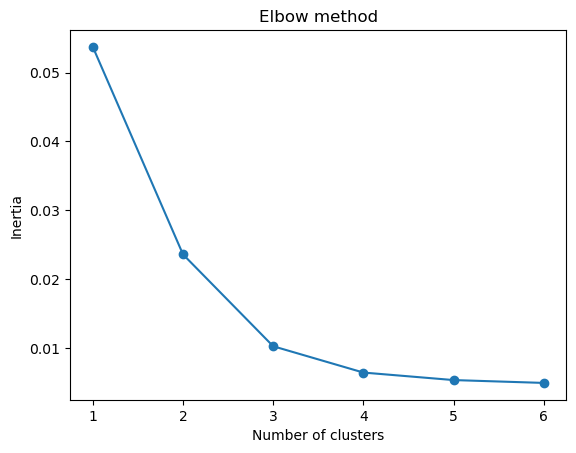

In [14]:
tag_key ='in.comstock_building_type'
tag_values_dict_comstock_building_type = get_building_tag_values(df = df_with_tags,
                                                                 tag_key =tag_key)

bldg_ids = []
for key in tag_values_dict_comstock_building_type.keys():
    bldg_ids.append(tag_values_dict_comstock_building_type[key])
    
bldg_ids_list = [item for sublist in bldg_ids for item in sublist]

# Here we use the 24 features for the cold season for illustrative purposes. 
# Other seasons, and in general, other feature sets could be used for training the k-shape (or other clustering) algorithms
X = df_normalized.loc[bldg_ids_list]['cold'].values

inertias = []
n_clusters_max = 6

for n_clusters in range(1,n_clusters_max+1):
    best_model, X_scaled = fit_kshape_clustering(n_clusters = n_clusters, X = X, num_seeds=10)
    inertias.append(best_model.inertia_)

plt.plot(range(1,n_clusters_max+1), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()



Following the elbow method results, we opt for 3 clusters as the ideal number. Subsequently, we visualize these 3 clusters, presenting their cluster centroids in red and the corresponding assigned profiles in gray. Additionally, within each cluster, we calculate and display the count of buildings for each of the three commercial building types (Hospital, Primary School, and Small Hotel) based on their building tags. A visual inspection reveals the distinct patterns associated with each building type, showcasing the k-shape algorithm's effective categorization.

It's crucial to emphasize that the primary goal of this challenge is not to cluster buildings based on their metadata tags, even if we had access to such metadata. The inclusion of building tags here is purely for illustrative purposes; these specific buildings were intentionally chosen for very distinct load profiles and to show that building tags can <i>sometimes</i> serve as a meaningful clustering criterion. However, it's essential to recognize that this is not always the case, even with metadata information available. We reiterate that the core objective of this challenge remains the clustering of similar load profiles for practical implementation in demand-response (DR) programs of your choosing.

We would also like to emphasize again that we <b>strongly recommend</b> keeping the number of clusters under <b>10</b> (i.e. <b>n_clusters <=10</b>), as designing DR programs for a very large number of building clusters (customer segments) is often not very practical. With that said, if a slightly larger number of clusters strongly suits your chosen DR program, you may go as high as <b>15</b>, but certainly no more than that. <i>Exceeding 10 clusters must be thoroughly justified, and 15 is a strict upper limit</i>.

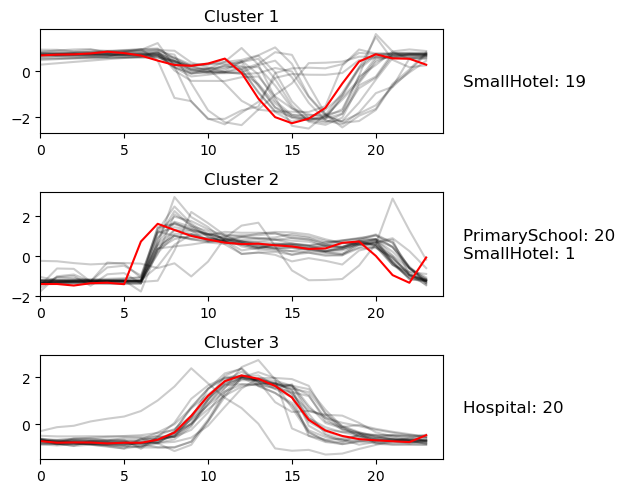

In [16]:
n_clusters = 3

X = df_normalized.loc[bldg_ids_list]['cold'].values

best_model, X_scaled = fit_kshape_clustering(n_clusters = n_clusters, 
                                             X = X,
                                             num_seeds=10)

plot_kshape_clustering(X = X_scaled, ks =best_model , 
                       df_with_tags = df_with_tags,
                       bldg_ids_list = bldg_ids_list,
                       tag_key = tag_key)

The clustering results above offer valuable insights for designing diverse DR programs. For instance, Cluster 1 predominantly comprises small hotels with similar load shapes, showcasing varying times of minimum consumption (valleys in the load profile). Strategically shifting these valleys toward on-peak hours for electricity consumption could prove beneficial for the grid, alleviating strain during peak demand hours typically between 18:00 to 22:00. By introducing Time-of-Use (ToU) tariffs with higher rates during peak hours, these hotels might be incentivized to align their low-consumption periods with peak hours, potentially reducing their costs.

Moreover, buildings sharing a similar shape (same cluster) and exhibiting consistent peak and valley timings within each cluster could be consolidated for the purpose of selling electricity back to the grid. This holds true particularly for buildings equipped with on-site resources like photovoltaic panels. These two examples represent just two straightforward recommendation derived from the results. We encourage you to formulate comprehensive and innovative solutions based on your analysis and clustering outcomes.

Next, we apply the elbow test to cluster residential buildings. Despite the elbow test suggesting that 4 or 5 clusters could be appropriate, we decide to opt for 2 clusters to account for the two states where the buildings are located (TX and MA). While the clustering outcome with `n_clusters = 2` appears reasonable, it may not necessarily represent the optimal number of clusters for the ultimate objective of DR program design. This scenario serves as an example where metadata alone may not provide sufficient information or could even lead to misinterpretation, depending on the specific demand-response program being designed.

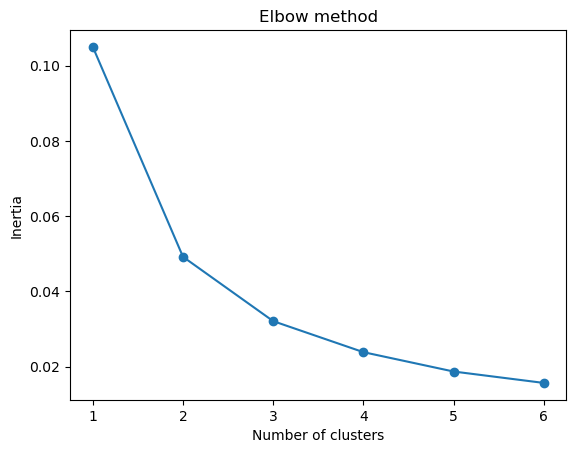

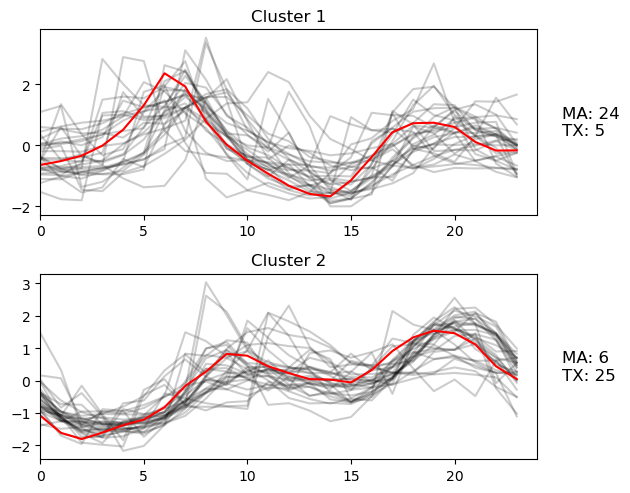

In [21]:
tag_key ='in.state'
tag_values_dict_state = get_building_tag_values(df = df_with_tags, tag_key = tag_key)

cluster_names = ['MA', 'TX']


bldg_ids = []
for key in tag_values_dict_state.keys():
    bldg_ids.append(tag_values_dict_state[key])
    
bldg_ids_list = [item for sublist in bldg_ids for item in sublist]
X = df_normalized.loc[bldg_ids_list]['cold'].values

inertias = []
n_clusters_max = 6

for n_clusters in range(1,n_clusters_max+1):
    best_model, X_scaled = fit_kshape_clustering(n_clusters = n_clusters, X = X, num_seeds=10)
    inertias.append(best_model.inertia_)

plt.plot(range(1,n_clusters_max+1), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

n_clusters = 2

X = df_normalized.loc[bldg_ids_list]['cold'].values

best_model, X_scaled = fit_kshape_clustering(n_clusters = n_clusters, 
                                             X = X,
                                             num_seeds=10)

plot_kshape_clustering(X = X_scaled, ks =best_model , 
                       df_with_tags = df_with_tags,
                       bldg_ids_list = bldg_ids_list,
                       tag_key = tag_key)